#Use the following Clustering Algorithms

1. Hierarchical Clustering (Use Euclidian Distance Function)
2. BIRCH Clustering

dataset:plants.zip

In [ ]:
!unzip '/content/plants.zip'


Archive:  /content/plants.zip
replace plants.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: plants.csv              
replace plants.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: plants.txt              
replace stateabbr.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: stateabbr.txt           


In [ ]:
# Input
import pandas as pd
import io

#estimated max length of columns 
N = 67

#after testing replace io.StringIO(temp) to filename
data1 = pd.read_csv('/content/plants.csv', 
                  
                 header = None, #first row is not header, read all data to df
                 names=range(N), encoding='latin-1') 

In [ ]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
0,abelia,fl,nc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,abelia x grandiflora,fl,nc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abelmoschus,ct,dc,fl,hi,il,ky,la,md,mi,ms,nc,sc,va,pr,vi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,abelmoschus esculentus,ct,dc,fl,il,ky,la,md,mi,ms,nc,sc,va,pr,vi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abelmoschus moschatus,hi,pr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x=le.fit_transform(data1[0])
y = pd.Series(data1.iloc[:,1:].fillna('').values.tolist()).str.join('')

y=le.fit_transform(y)


In [ ]:
x=list(x)
y=list(y)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns; sns.set()
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn import preprocessing

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch





**Hierarchical Clustering (Use Euclidian Distance Function)**

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

For most common hierarchical clustering algorithm, the default distance measure is the Euclidean distance. This is the square root of the sum of the square differences

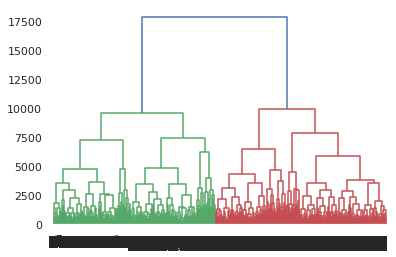

In [ ]:
df=pd.DataFrame({'A':x,"B":y})

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
model.fit(df)
labels = (model.labels_)

dendrogram = sch.dendrogram(sch.linkage(df, method='average'))








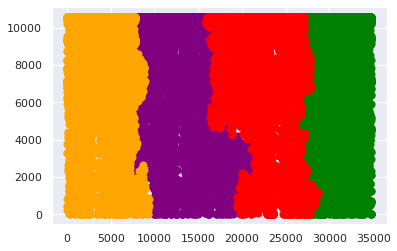

In [ ]:
df = df.to_numpy()
plt.scatter(df[labels==0, 0], df[labels==0, 1], s=50, marker='o', color='purple')
plt.scatter(df[labels==1, 0], df[labels==1, 1], s=50, marker='o', color='orange')
plt.scatter(df[labels==2, 0], df[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(df[labels==3, 0], df[labels==3, 1], s=50, marker='o', color='red')
plt.scatter(df[labels==4, 0], df[labels==4, 1], s=50, marker='o', color='red')
plt.show()

**BIRCH CLUSTERING**

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset.

BIRCH is often used to complement other clustering algorithms by creating a summary of the dataset that the other clustering algorithm can now use. However, BIRCH has one major drawback – it can only process metric attributes. A metric attribute is any attribute whose values can be represented in Euclidean space i.e., no categorical attributes should be present.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch
  
model1 = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
  
# Fit the data (Training)
model1.fit(df)
  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
      threshold=1.5)

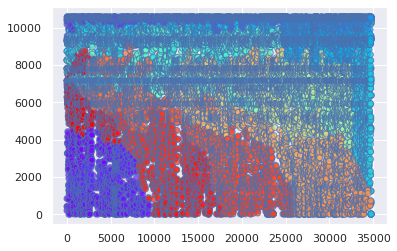

In [ ]:
# Predict the same data
pred = model1.predict(df)
  
# Creating a scatter plot
plt.scatter(df[:,0],df[:,1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

#use following classifiers

1. Naïve Bayes
2. Gradient Boosting

dataset used:DelhiWeather.csv 

Compare the performance of classifiers using the following metrics:

a) F - Score b) ROC & AUC Curve
c) R2
 d) Accuracy

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('/content/DelhiWeather.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

**PRE PROCESSING**

 handling NAN values 

 - removing thefollowing columns since they have comparatively less data
 
  _windchillm',' _wgustm',' _precipm',' _heatindexm'

- then filling numeric missing values using mean and string using forward fill .

- using label encoder to convert strings(objects) to int (basically one hot encoding by filling 0 to n-1 values for each category)

In [ ]:
data=data.drop([' _windchillm',' _wgustm',' _precipm',' _heatindexm'],axis=1)

In [ ]:
i=[' _wdire','datetime_utc',' _conds']
for col in data:
  if col not in i:
    data[col].fillna(data[col].mean(), inplace=True)
  else:
     data.ffill(axis = 0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100990 non-null  object 
 2    _dewptm      100990 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _hum         100990 non-null  float64
 6    _pressurem   100990 non-null  float64
 7    _rain        100990 non-null  int64  
 8    _snow        100990 non-null  int64  
 9    _tempm       100990 non-null  float64
 10   _thunder     100990 non-null  int64  
 11   _tornado     100990 non-null  int64  
 12   _vism        100990 non-null  float64
 13   _wdird       100990 non-null  float64
 14   _wdire       100990 non-null  object 
 15   _wspdm       100990 non-null  float64
dtypes: float64(7), int64(6), object(3)
memory usage: 12.3+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
data[' _conds']= le.fit_transform(data[' _conds']) 
data[' _wdire']= le.fit_transform(data[' _wdire'])
X= data.drop([' _conds','datetime_utc'],axis=1)
y=data[' _conds']

**BUILDING THE MODELS**

GaussianNB:

This extension of naive Bayes is called Gaussian Naive Bayes. Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data.

Gradient Boosting:

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

**METRICS USED TO COMPARE THE MODELS**

-Accuracy

-F score

-Roc_Auc curve

-R2

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = GaussianNB()
model.fit(X_train, y_train)


predicted = model.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.04      0.73      0.08        56
           1       0.05      0.01      0.01       623
           2       0.00      0.00      0.00        30
           3       0.73      0.48      0.58       555
           4       0.00      0.00      0.00         2
           5       0.84      0.23      0.36      9507
           6       0.19      0.84      0.31        77
           7       0.03      0.75      0.06         8
           8       0.03      0.75      0.05         4
          10       1.00      0.01      0.02        86
          11       0.02      0.62      0.03         8
          14       0.00      0.00      0.00         0
          15       0.66      0.23      0.34       273
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.31      0.57      0.40        14
          19       0.33      0.03      0.05        38
          20       0.31    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate=0.1)
model2.fit(X_train,y_train)



predicted2 = model2.predict(X_test)

print(metrics.classification_report(y_test, predicted2))
print(metrics.confusion_matrix(y_test, predicted2))



              precision    recall  f1-score   support

           0       0.52      0.57      0.55        56
           1       0.51      0.37      0.42       623
           2       0.00      0.00      0.00        30
           3       0.81      0.76      0.78       555
           4       0.00      0.00      0.00         2
           5       0.77      0.88      0.82      9507
           6       0.69      0.53      0.60        77
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         4
          10       0.00      0.00      0.00        86
          11       0.10      0.25      0.14         8
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.69      0.90      0.79       273
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00        14
          19       0.00      0.00      0.00        38
          20       0.78    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve

pred_prob1 = model.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb =preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


auc_score1 =multiclass_roc_auc_score(y_test, predicted)
 
auc_score2 = multiclass_roc_auc_score(y_test, predicted2)

print('scores of model 1:',auc_score1)
print('scores of model 2:', auc_score2)

scores of model 1: 0.6465470923068238
scores of model 2: 0.6562486177600898


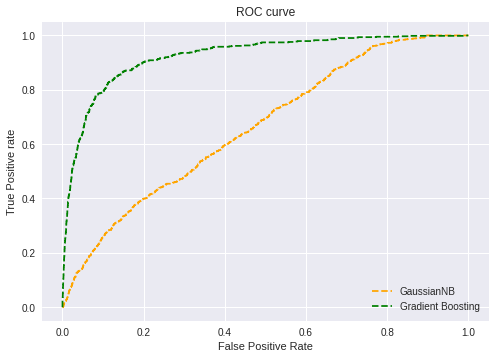

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GaussianNB')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Gradient Boosting')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import r2_score
r2m1 = r2_score(y_test, predicted)
r2m2 = r2_score(y_test, predicted2)
print('r2 score for model1', r2m1)
print('r2 score for model2', r2m2)

r2 score for model1 -0.9381608553547858
r2 score for model2 0.13599366273151403


*Note:  R2  compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.*